In [50]:
words = open('names.txt', 'r').read().splitlines()

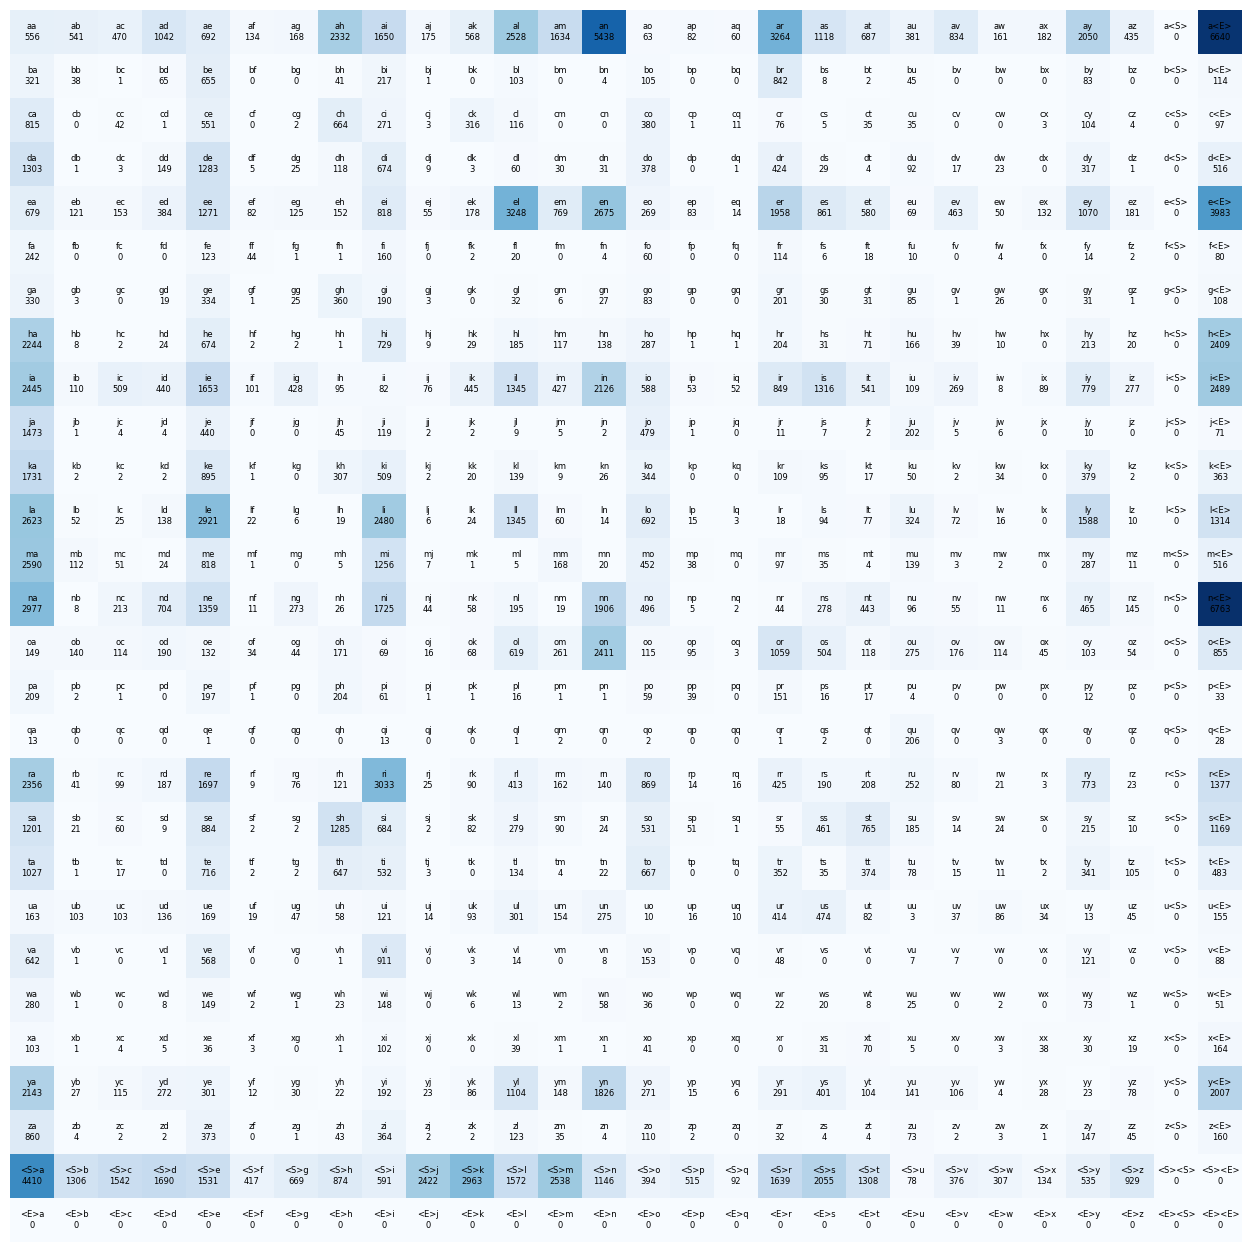

In [48]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

allwords = ''.join(words)
chars = sorted(list(set(allwords)))
chars.append('<S>')
chars.append('<E>')

stoi = {s:i for i,s in enumerate(chars)}
itos = {i:s for i,s in enumerate(chars)}

N = torch.zeros((len(chars), len(chars)), dtype=torch.int32)

for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')

for i in range(len(chars)):
    for j in range(len(chars)):
        plt.text(j, i, f"{itos[i]}{itos[j]}\n{N[i,j].item()}",
                 ha='center', va='center', fontsize=6)

plt.axis('off')
plt.savefig("bigram_heatmap.png", dpi=300, bbox_inches='tight')

plt.show()


In [5]:
dist = N[0].float()
dist /= dist.sum()
dist



tensor([0.0164, 0.0160, 0.0139, 0.0308, 0.0204, 0.0040, 0.0050, 0.0688, 0.0487,
        0.0052, 0.0168, 0.0746, 0.0482, 0.1605, 0.0019, 0.0024, 0.0018, 0.0963,
        0.0330, 0.0203, 0.0112, 0.0246, 0.0048, 0.0054, 0.0605, 0.0128, 0.0000,
        0.1960])

In [6]:
g = torch.Generator().manual_seed(112234234)
p = torch.rand(3, generator = g)
p /= p.sum()
p.size(0)


3

In [7]:
torch.multinomial(p, num_samples= 100, replacement=True, generator=g)

tensor([1, 1, 0, 1, 0, 0, 2, 0, 0, 1, 1, 2, 1, 0, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1,
        1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 1, 1, 2, 2, 2, 2,
        1, 1, 0, 2, 2, 1, 0, 1, 2, 1, 0, 2, 1, 2, 2, 0, 0, 1, 0, 1, 1, 2, 1, 2,
        0, 1, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1, 0, 2, 0, 2, 2, 0, 2, 1, 1,
        2, 1, 0, 0])

In [8]:
sample = torch.multinomial(dist, num_samples= 1, replacement=True, generator=g)
sample


tensor([17])

In [9]:
dist_all = (N+1).float()
dist_all /= dist_all.sum(1, keepdim=True)
g = torch.Generator().manual_seed(11224234)

for n in range(3):
    out = []
    ix = 0
    while True:
        ix = torch.multinomial(dist_all[ix], num_samples= 1, replacement=True, generator=g ).item()
        out.append(itos[ix])
        if ix == 27:
            break
    print(''.join(out))

iumolinevamy<E>
pph<E>
lw<E>


In [10]:
n = 0
sumlogprobs = 0.0

for w in words:
#for w in ["monqf"]:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = dist_all[ix1, ix2]
        logprob = torch.log(prob)
        n += 1
        
        neglogprob = -logprob
        sumlogprobs += neglogprob
       # print(f'{ch1}, {ch2}: {prob:.3f} {logprob: .4f} {neglogprob: .4f}')



print(n)
print(sumlogprobs)
print((sumlogprobs/n).item())

228146
tensor(559978.7500)
2.4544754028320312


In [97]:
xs, ys = [],[]

for w in words[:1]:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
        

In [98]:
#xs
ys


tensor([ 4, 12, 12,  0, 27])

In [99]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=28).float()
xenc


tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [14]:
xenc.shape

torch.Size([5, 28])

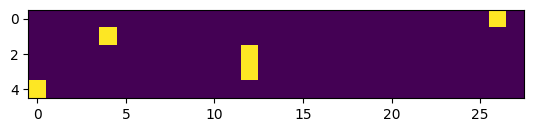

In [100]:
plt.imshow(xenc)

In [101]:
xenc.dtype

torch.float32

In [102]:
W = torch.randn(28, 28)
neurons = xenc @ W 
neurons

tensor([[ 1.6455,  0.8918,  0.7299,  0.4247, -0.5981, -0.7026, -0.1759, -0.9019,
          0.9312,  1.2878,  1.2761, -0.5226,  0.4472, -0.7523, -0.6699,  0.6966,
         -0.8893,  0.9724, -0.5307, -0.1207,  0.5449,  0.7611,  0.4929, -1.3305,
          1.4109, -0.6188,  0.9412,  0.1080],
        [ 0.1999,  0.0772, -0.8211, -1.7951,  0.6858,  0.0046,  1.5983,  0.3077,
         -0.7418, -0.9054, -0.0073,  1.1326, -0.5064, -0.4582,  0.2473,  0.2712,
          0.5711, -0.1091,  0.2288,  2.5792, -1.2771, -0.6103,  0.2446,  0.0805,
         -2.0282, -0.1877, -0.2629,  0.6495],
        [-1.2955,  1.1819,  0.8518,  1.3839, -0.0507, -0.1232, -0.4085,  0.3066,
         -0.6118,  2.6349, -0.3185, -0.1288,  1.1498, -2.0009,  0.0527,  0.5670,
         -1.2306, -0.3321,  0.8863,  1.4905, -1.1701, -0.4471,  0.6279,  0.6562,
          2.1012,  1.3288, -0.1799,  1.7439],
        [-1.2955,  1.1819,  0.8518,  1.3839, -0.0507, -0.1232, -0.4085,  0.3066,
         -0.6118,  2.6349, -0.3185, -0.1288,  1.1498

In [103]:
(xenc @ W)[0, 4]


tensor(-0.5981)

In [104]:
(xenc @ W).exp()

tensor([[ 5.1834,  2.4395,  2.0748,  1.5291,  0.5499,  0.4953,  0.8387,  0.4058,
          2.5376,  3.6248,  3.5826,  0.5930,  1.5639,  0.4713,  0.5118,  2.0069,
          0.4110,  2.6444,  0.5882,  0.8863,  1.7244,  2.1407,  1.6371,  0.2643,
          4.0997,  0.5386,  2.5631,  1.1140],
        [ 1.2213,  1.0803,  0.4400,  0.1661,  1.9854,  1.0046,  4.9447,  1.3604,
          0.4762,  0.4044,  0.9927,  3.1037,  0.6027,  0.6324,  1.2805,  1.3116,
          1.7702,  0.8966,  1.2571, 13.1870,  0.2788,  0.5432,  1.2772,  1.0839,
          0.1316,  0.8289,  0.7689,  1.9146],
        [ 0.2738,  3.2604,  2.3438,  3.9904,  0.9505,  0.8841,  0.6647,  1.3589,
          0.5424, 13.9422,  0.7272,  0.8792,  3.1577,  0.1352,  1.0541,  1.7631,
          0.2921,  0.7174,  2.4261,  4.4391,  0.3103,  0.6395,  1.8737,  1.9274,
          8.1757,  3.7767,  0.8354,  5.7197],
        [ 0.2738,  3.2604,  2.3438,  3.9904,  0.9505,  0.8841,  0.6647,  1.3589,
          0.5424, 13.9422,  0.7272,  0.8792,  3.1577

In [20]:
xs

tensor([26,  4, 12, 12,  0])

In [21]:
ys

tensor([ 4, 12, 12,  0, 27])

In [106]:
allneglogs = torch.zeros(5)
xenc = F.one_hot(xs, num_classes=28).float()
g = torch.Generator().manual_seed(11224234)

W = torch.randn((28, 28), generator=g, requires_grad=True)
logits = xenc @ W
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)

for i in range(5):
    x = xs[i].item()
    y = ys[i].item()
    p = probs[i, y]

    print(itos[x], itos[y])
    print("probability")
    print(p.item())
    
    neglogp = -(torch.log(p))
    print("neg log")
    print(neglogp.item())

    allneglogs[i] = neglogp
    

    
print("average neg log, also known as loss=")
print(allneglogs.mean().item())

<S> e
probability
0.0030864146538078785
neg log
5.780745029449463
e m
probability
0.003549822373315692
neg log
5.640857696533203
m m
probability
0.041378531605005264
neg log
3.184993028640747
m a
probability
0.008274896070361137
neg log
4.794528961181641
a <E>
probability
0.02890239842236042
neg log
3.543830633163452
average neg log, also known as loss=
4.588991165161133


In [107]:
xenc = F.one_hot(xs, num_classes=28).float()
logits = xenc @ W
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)

In [108]:
loss = -probs[torch.arange(5), ys].log().mean()
loss.item()

4.588991165161133

In [109]:
W.grad = None
loss.backward()

In [29]:
W.grad.shape
W.grad

tensor([[ 0.0044,  0.0050,  0.0023,  0.0032,  0.0072,  0.0041,  0.0104,  0.0049,
          0.0096,  0.0129,  0.0027,  0.0046,  0.0123,  0.0052,  0.0099,  0.0013,
          0.0078,  0.0010,  0.0017,  0.0232,  0.0088,  0.0036,  0.0290,  0.0095,
          0.0015,  0.0060,  0.0019, -0.1942],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000

In [110]:
W.data += -0.01 * W.grad

In [111]:
#init
xs, ys = [], []
for w in words:
    chars = ['<S>'] + list(w) + ['<E>']
    for char1, char2 in zip(chars, chars[1:]):
        ix1 = stoi[char1]
        ix2 = stoi[char2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()

g = torch.Generator().manual_seed(145324423)
W = torch.randn((28, 28), generator=g, requires_grad=True)

In [113]:
#gradient descent
for k in range(10):
    #forward pass
    xenc = F.one_hot(xs, num_classes=28).float()
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdims=True)
    loss = -probs[torch.arange(num), ys].log().mean() + 0.01 * (W**2).mean()
    print(loss.item())

    #backward
    W.grad = None
    loss.backward()

    #update 
    W.data += -100 * W.grad

2.5304317474365234
2.5104658603668213
2.5110204219818115
2.5139541625976562
2.530202865600586
2.5102415084838867
2.5107991695404053
2.513741970062256
2.529996633529663
2.510039806365967


In [114]:
#sampling
g = torch.Generator().manual_seed(145324423)

for i in range(5):

    name = []
    ix = 0
    while True:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=28).float()
        logits = xenc @ W
        counts = logits.exp()
        probs = counts / counts.sum(1, keepdims=True)

        ix = torch.multinomial(probs, num_samples=1, replacement=True, generator=g).item()
        name.append(itos[ix])
        if ix == 27:
            break
    print(''.join(name))
        

melylin<E>
tosh<E>
elinen<E>
n<E>
gsahrmaquan<E>
